In [1]:
import os
import numpy as np
def normalize(x):
    min_x=np.min(x)
    max_x=np.max(x)
    for i in range(len(x)):
        x[i]=(x[i]-min_x)/(max_x-min_x)
    return x

In [10]:
data=np.genfromtxt("C:\\Users\\Administrator\\Desktop\\数学建模\\mlp数据\\1-task.txt",
                   dtype=float,delimiter=',')

In [13]:
data=normalize(data)

In [14]:
b_2_transfer=np.genfromtxt("C:\\Users\\Administrator\\Desktop\\数学建模\\transfer-distance-2.csv",
                   dtype=float,delimiter=',')

In [16]:
print (b_2_transfer.shape)

(1877, 2)


In [17]:
time=np.genfromtxt("C:\\Users\\Administrator\\Desktop\\数学建模\\time_",
                   dtype=float,delimiter=',')

In [19]:
print (len(time))

1877


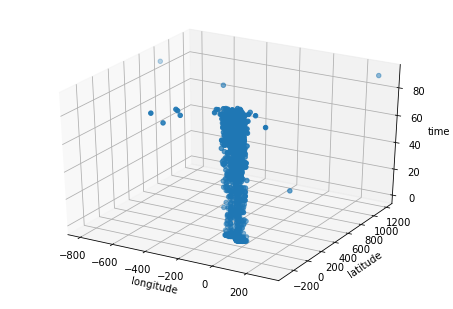

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(b_2_transfer[:,0],b_2_transfer[:,1],time)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('time')
plt.savefig('scatter_time.png')

In [21]:
new_x=[]
new_y=[]
new_time=[]
for i in range(len(b_2_transfer[:,0])):
    if np.abs(b_2_transfer[i,0])>200 or np.abs(b_2_transfer[i,1])>200:
        continue
    else:
        new_x.append(b_2_transfer[i,0])
        new_y.append(b_2_transfer[i,1])
        new_time.append(time[i])

In [22]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(new_x,new_y,new_time)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('time')
plt.savefig('scatter_time_select.png')

In [23]:
import math
import heapq
def torad(d):
    return d*math.pi/180.0
data1=np.genfromtxt("C:\\Users\\Administrator\\Desktop\\数学建模\\b-1.csv",dtype=float,delimiter=',')
magnitude=data1[1:,1]
latitude=data1[1:,2]
price=data1[1:,3]
price_all=np.zeros((len(magnitude),9))
def transfer(a1,b1,a2,b2):
    a1=torad(a1)
    b1=torad(b1)
    a2=torad(a2)
    b2=torad(b2)
    s=2.0*math.asin(math.sqrt((math.sin((b2-b1)/2.0)**2)+math.cos(b1)*math.cos(b2)*(math.sin((a2-a1)/2.0)**2)))*6378.137
    return s

for i in range(len(magnitude)):
    dis=[]
    for j in range(len(magnitude)):
        if i==j:
            continue
        else:
            dis.append(transfer(magnitude[j],latitude[j],magnitude[i],latitude[i]))
    index=heapq.nsmallest(5, range(len(dis)), dis.__getitem__)
    price_tmp=[]
    for k in range(len(index)):
        price_tmp.append(price[k])
    # price_tmp=np.array(price_tmp)
    tmp=np.array(price_tmp)
    price_tmp.append(np.max(tmp))
    price_tmp.append(np.min(tmp))
    price_tmp.append(np.mean(tmp))
    price_tmp.append(np.median(tmp))
    price_all[i]=price_tmp
    
def think_near(magnitude,num,price):
    price_all=np.zeros((len(magnitude),num+4))
    for i in range(len(magnitude)):
        dis=[]
        for j in range(len(magnitude)):
            if i==j:
                continue
            else:
                dis.append(transfer(magnitude[j],latitude[j],magnitude[i],latitude[i]))
        index=heapq.nsmallest(num, range(len(dis)), dis.__getitem__)
        price_tmp=[]
        for k in range(len(index)):
            price_tmp.append(price[index[k]])
        tmp=np.array(price_tmp)
        price_tmp.append(np.max(tmp))
        price_tmp.append(np.min(tmp))
        price_tmp.append(np.mean(tmp))
        price_tmp.append(np.median(tmp))
        price_all[i]=price_tmp

In [33]:
def think_near(magnitude,num,price):
    price_all=np.zeros((len(magnitude),num+4))
    for i in range(len(magnitude)):
        dis=[]
        for j in range(len(magnitude)):
            if i==j:
                continue
            else:
                dis.append(transfer(magnitude[j],latitude[j],magnitude[i],latitude[i]))
        index=heapq.nsmallest(num, range(len(dis)), dis.__getitem__)
        price_tmp=[]
        for k in range(len(index)):
            price_tmp.append(price[k])
        tmp=np.array(price_tmp)
        price_tmp.append(np.max(tmp))
        price_tmp.append(np.min(tmp))
        price_tmp.append(np.mean(tmp))
        price_tmp.append(np.median(tmp))
        price_all[i]=price_tmp
    return  price_all

In [35]:
price_all_ten=think_near(magnitude,10,price)

In [36]:
def write_file(name,price_all,num,price):
    out=open(name,"w")
    for i in range(num):
        out.write(str(num+1)+',')
    out.write('max,min,mean,median,price\n')
    for i in range(np.shape(price_all)[0]):
        for j in range(np.shape(price_all)[1]):
            out.write(str(price_all[i][j])+',')
        out.write(str(price[i])+'\n')
    out.close()

In [38]:
print(price_all_ten[1:3,:])

[[ 66.    65.5   65.5   75.    65.5   75.    65.5   65.5   66.    66.    75.
   65.5   67.55  65.75]
 [ 66.    65.5   65.5   75.    65.5   75.    65.5   65.5   66.    66.    75.
   65.5   67.55  65.75]]


In [37]:
write_file("C:\\Users\\Administrator\\Desktop\\数学建模\\b-1-price_all-10.csv",price_all_ten,10,price)

In [25]:
print (price_all.shape)

(835, 9)


In [26]:
out=open("C:\\Users\\Administrator\\Desktop\\数学建模\\b-1-price_all.csv","w")
out.write("1,2,3,4,5,max,min,mean,median,price\n")
for i in range(len(price_all)):
    for j in range(9):
        out.write(str(price_all[i][j])+',')
    out.write(str(price[i])+'\n')
out.close()

In [27]:
max_error=0
min_error=0
mean_error=0
median_error=0
for i in range(len(price)):
    max_error+=np.abs(price_all[i][5]-price[i])
    min_error+=np.abs(price_all[i][6]-price[i])
    mean_error+=np.abs(price_all[i][7]-price[i])
    median_error+=np.abs(price_all[i][8]-price[i])
print (max_error)
print (min_error)
print (mean_error)
print (median_error)

5587.5
3080.0
2743.0
3080.0


In [39]:
from PIL import Image
from pylab import *
img=Image.open("C:\\Users\\Administrator\\Desktop\\数学建模\\1.png")
array_=array(img)
print (np.shape(array_))

(360, 360)


In [40]:
img.save("C:\\Users\\Administrator\\Desktop\\数学建模\\1_demo.png")